# Classification Project: US Census Data

Coded by Luna McBride

In [179]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt # plotting and exploration
%matplotlib inline

from sklearn.linear_model import LogisticRegression #Our Linear Regression Model
from sklearn.tree import DecisionTreeClassifier #Add a tree for testing
from sklearn.ensemble import ExtraTreesClassifier #Add extra tree classifier for comparison
from sklearn.ensemble import GradientBoostingClassifier #Add a gradient boosted classifier for more comparison
from sklearn.ensemble import VotingClassifier #Add a voting classifier to see if it helps

from sklearn.preprocessing import StandardScaler #Scale the model
from sklearn.metrics import classification_report #Report on the classification

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-census-data/adult-training.csv
/kaggle/input/us-census-data/adult-test.csv


In [180]:
train = pd.read_csv("../input/us-census-data/adult-training.csv") #Load the training data
train.head() #Take a peek at the training data

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [181]:
test = pd.read_csv("../input/us-census-data/adult-test.csv") #Load the testing data
test.head() #Take a peek at the testing data

,,,,,,,,,,,,,,|1x3 Cross validator
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


---

# Make the data spiffy

In [182]:
test.reset_index(inplace = True) #Reset the indecies of test to pull the information into proper columns
test.head() #Take a peek at the test set

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10,level_11,level_12,level_13,|1x3 Cross validator
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [183]:
#Add all the name conversions based on the original data source
names = {"level_0" : "Age", "level_1" : "WorkClass", "level_2" : "fnlwgt", "level_3" : "Education", "level_4" : "EducationIndex",
        "level_5" : "MaritalStatus", "level_6" : "Occupation", "level_7" : "Relationship", "level_8" : "Race", "level_9" : "Gender",
        "level_10" : "CapitalGain", "level_11" : "CapitalLoss", "level_12" : "HoursWorked", "level_13" : "NativeCountry", 
        "|1x3 Cross validator" : "IncomeBracket"}
test = test.rename(columns = names) #Rename the columns
test.head() #Take a peek at the spiffy test set

,Age,WorkClass,fnlwgt,Education,EducationIndex,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursWorked,NativeCountry,IncomeBracket
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [184]:
train.head() #Take a peek at the train set in order to compare and reassign column names

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [185]:
#Add all the name conversions based on the original data source
namesTrain = {"39" : "Age", " State-gov" : "WorkClass", " 77516" : "fnlwgt", " Bachelors" : "Education", " 13" : "EducationIndex",
              " Never-married" : "MaritalStatus", " Adm-clerical" : "Occupation", " Not-in-family" : "Relationship", " White" : "Race", 
              " Male" : "Gender", " 2174" : "CapitalGain", " 0" : "CapitalLoss", " 40" : "HoursWorked", " United-States" : "NativeCountry", 
              " <=50K" : "IncomeBracket"}
train = train.rename(columns = namesTrain) #Rename the train columns
train.head() #Take a peek at the spiffy train data

,Age,WorkClass,fnlwgt,Education,EducationIndex,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursWorked,NativeCountry,IncomeBracket
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


---

# Fix null/? values

I did see ?, so I assume that is the replacement for null

In [186]:
train.replace(' ?', np.nan, inplace=True) #Change training ? into null
test.replace(' ?', np.nan, inplace=True) #Change testing ? into null
test.head() #Check the test set for if it worked, as the ? appeared early in test

,Age,WorkClass,fnlwgt,Education,EducationIndex,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursWorked,NativeCountry,IncomeBracket
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [187]:
print("Training Set Nulls:\n", train.isnull().any()) #Check the train set for nulls
print("\nTesting Set Nulls:\n", test.isnull().any()) #Check the test set for nulls

Training Set Nulls:
 Age               False
WorkClass          True
fnlwgt            False
Education         False
EducationIndex    False
MaritalStatus     False
Occupation         True
Relationship      False
Race              False
Gender            False
CapitalGain       False
CapitalLoss       False
HoursWorked       False
NativeCountry      True
IncomeBracket     False
dtype: bool

Testing Set Nulls:
 Age               False
WorkClass          True
fnlwgt            False
Education         False
EducationIndex    False
MaritalStatus     False
Occupation         True
Relationship      False
Race              False
Gender            False
CapitalGain       False
CapitalLoss       False
HoursWorked       False
NativeCountry      True
IncomeBracket     False
dtype: bool


Working Class, Occupation, and Native Country all have nulls in both sets, so I with replace them. I think "None" will work for Working Class and Occupation, as these are likely people without jobs. As for Native Country, I will replace that with unknown.

In [188]:
train["NativeCountry"] = train["NativeCountry"].fillna("Unknown") #Fill NativeCountry with "Unknown"
train = train.fillna("None") #Fill the other nulls with "None"
test["NativeCountry"] = test["NativeCountry"].fillna("Unknown") #Fill NativeCountry with "Unknown"
test = test.fillna("None") #Fill the other nulls with "None"
test.head() #Take a peek at the test data to make sure it applied

,Age,WorkClass,fnlwgt,Education,EducationIndex,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursWorked,NativeCountry,IncomeBracket
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,None,103497,Some-college,10,Never-married,None,Own-child,White,Female,0,0,30,United-States,<=50K.


In [189]:
print("Training Set Nulls:\n", train.isnull().any()) #Check the train set for nulls
print("\nTesting Set Nulls:\n", test.isnull().any()) #Check the test set for nulls

Training Set Nulls:
 Age               False
WorkClass         False
fnlwgt            False
Education         False
EducationIndex    False
MaritalStatus     False
Occupation        False
Relationship      False
Race              False
Gender            False
CapitalGain       False
CapitalLoss       False
HoursWorked       False
NativeCountry     False
IncomeBracket     False
dtype: bool

Testing Set Nulls:
 Age               False
WorkClass         False
fnlwgt            False
Education         False
EducationIndex    False
MaritalStatus     False
Occupation        False
Relationship      False
Race              False
Gender            False
CapitalGain       False
CapitalLoss       False
HoursWorked       False
NativeCountry     False
IncomeBracket     False
dtype: bool


No more null values. The data is now clean.

---

# Data Exploration

I kind of want to do a large scale exploration here, as some of this data does not make sense to me.

## Age

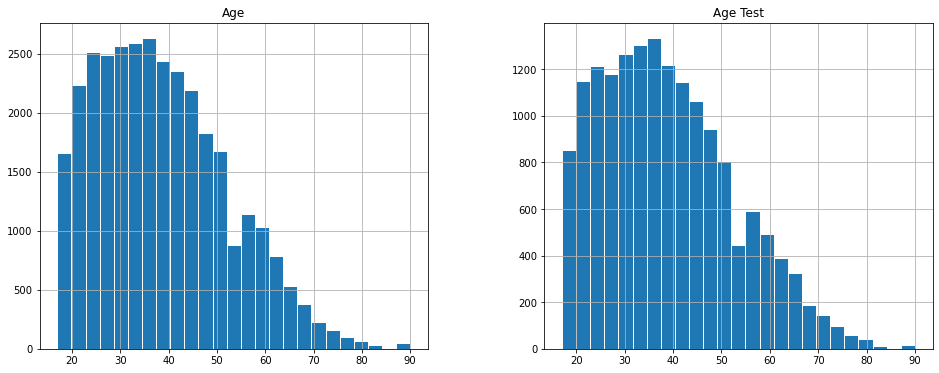

In [190]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6)) #Set the figures
train.hist(column = "Age", bins = 25, ax = axes[0], edgecolor = "white") #Load a histogram for the train ages
test.hist(column = "Age", bins = 25, ax = axes[1], edgecolor = "white") #Load a histogram for the test ages
axes[1].set_title("Age Test") #Set the Test title to identify it
plt.show() #Show the plot

The ages look fair. There are a lot more younger people, but that is expected in America.

## Work Class

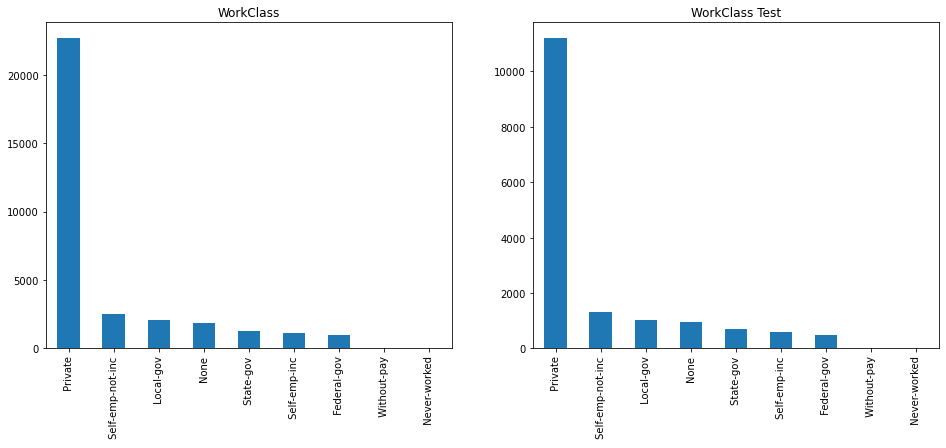

In [191]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6)) #Set the figures
train["WorkClass"].value_counts().plot.bar(ax = axes[0]) #Load a bar graph for the train WorkClass
test["WorkClass"].value_counts().plot.bar(ax = axes[1]) #Load a bar graph for the test WorkClass
axes[0].set_title("WorkClass") #Set the Train title to identify it
axes[1].set_title("WorkClass Test") #Set the Test title to identify it
plt.show() #Show the plot

Without pay and never worked are almost nothing. I think I will lump them in with None, as that is already a lump in with null.

In [192]:
#Replace Never-worked and Without-pay with None
train["WorkClass"].replace(" Without-pay", "None", inplace=True)
test["WorkClass"].replace(" Without-pay", "None" , inplace=True)
train["WorkClass"].replace(" Never-worked", "None", inplace=True)
test["WorkClass"].replace(" Never-worked", "None" , inplace=True)

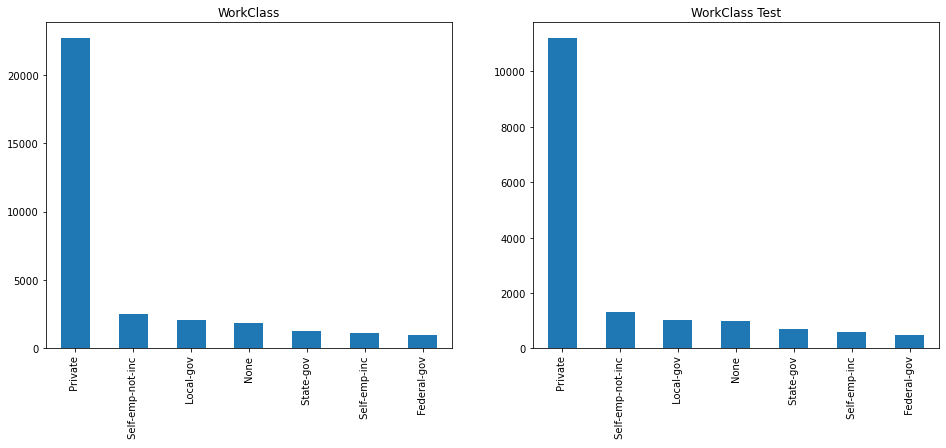

In [193]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6)) #Set the figures
train["WorkClass"].value_counts().plot.bar(ax = axes[0]) #Load a bar graph for the train WorkClass
test["WorkClass"].value_counts().plot.bar(ax = axes[1]) #Load a bar graph for the test WorkClass
axes[0].set_title("WorkClass") #Set the Train title to identify it
axes[1].set_title("WorkClass Test") #Set the Test title to identify it
plt.show() #Show the plot

## fnlwgt

According to the discussion post for this data, fnlwgt "is the (estimated) number of people each row in the data represents". I honestly cannot see this being useful for the purposes of the regression, as it does not really matter for a regression how many people fit this characteristic, so I am just going to drop it.

In [194]:
#Drop the fnlwgt of each dataset
train = train.drop(columns = ["fnlwgt"])
test = test.drop(columns = ["fnlwgt"])
test.head() #Take a peek at one to show it is gone

,Age,WorkClass,Education,EducationIndex,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursWorked,NativeCountry,IncomeBracket
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,None,Some-college,10,Never-married,None,Own-child,White,Female,0,0,30,United-States,<=50K.


## Education/Education Index

In [195]:
print(train[["Education", "EducationIndex"]].value_counts())

Education      EducationIndex
 HS-grad       9                 10501
 Some-college  10                 7291
 Bachelors     13                 5354
 Masters       14                 1723
 Assoc-voc     11                 1382
 11th          7                  1175
 Assoc-acdm    12                 1067
 10th          6                   933
 7th-8th       4                   646
 Prof-school   15                  576
 9th           5                   514
 12th          8                   433
 Doctorate     16                  413
 5th-6th       3                   333
 1st-4th       2                   168
 Preschool     1                    51
dtype: int64


The correlation between Education and Education Index is very weird. It has numbers for each grade level, but a lot of these categories are really unnecessary to be separate. Yet, if I do anything to the Education, Education Index no longer makes sense. I think I will fix the education as I see fit, then delete the index for now. Functions like Dummy Values provide a similar function anyway.

In [196]:
#Drop the Education Index of each dataset
train = train.drop(columns = ["EducationIndex"])
test = test.drop(columns = ["EducationIndex"])
test.head() #Take a peek at one to show it is gone

,Age,WorkClass,Education,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursWorked,NativeCountry,IncomeBracket
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,None,Some-college,Never-married,None,Own-child,White,Female,0,0,30,United-States,<=50K.


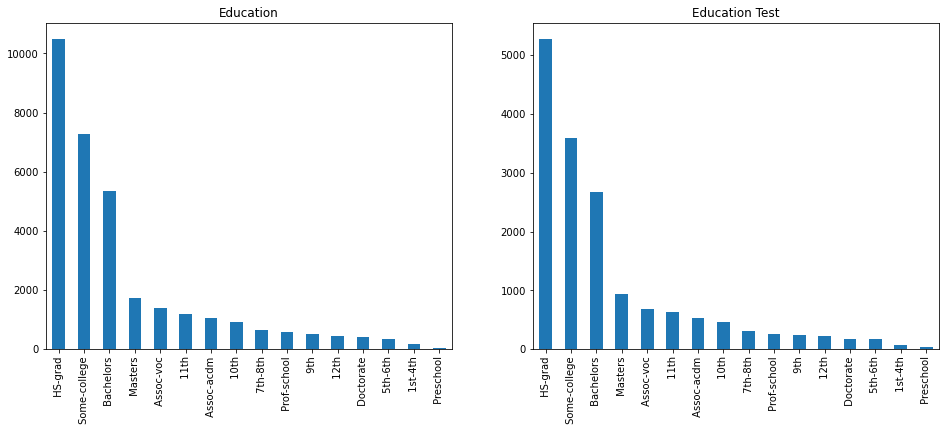

In [197]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6)) #Set the figures
train["Education"].value_counts().plot.bar(ax = axes[0]) #Load a bar graph for the train Education
test["Education"].value_counts().plot.bar(ax = axes[1]) #Load a bar graph for the test Education
axes[0].set_title("Education") #Set the Train title to identify it
axes[1].set_title("Education Test") #Set the Test title to identify it
plt.show() #Show the plot

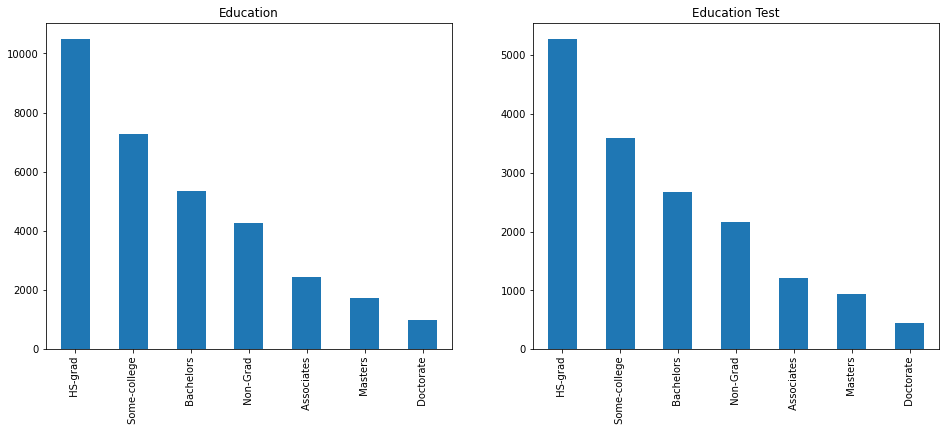

In [198]:
#ConvertEduc: Converts education levels into more congregated groups
#Input: the education level
#Output: the converted label
def convertEduc(level):
    #A list of labels that come together for the non-grad category
    levelsToChange = [" Preschool", " 1st-4th", " 5th-6th", " 7th-8th", " 9th", " 10th", " 11th", " 12th"]
    
    #If the person never graduated high school
    if level in levelsToChange:
        return " Non-Grad" #Return the collective non-grad category
    
    #If the person has an associate's degree, no matter where from
    if level == " Assoc-voc" or level == " Assoc-acdm":
        return " Associates" #Return that it is an associate's degree
    
    #If the level is prof-school, which I would consider essentially a doctorate
    if level == " Prof-school":
        return " Doctorate" #Return the doctorate label
    
    return level #Return the level label if there is nothing to change

train["Education"] = train["Education"].apply(convertEduc) #Convert the train education levels
test["Education"] = test["Education"].apply(convertEduc) #Convert the test education levels

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6)) #Set the figures
train["Education"].value_counts().plot.bar(ax = axes[0]) #Load a bar graph for the train Education
test["Education"].value_counts().plot.bar(ax = axes[1]) #Load a bar graph for the test Education
axes[0].set_title("Education") #Set the Train title to identify it
axes[1].set_title("Education Test") #Set the Test title to identify it
plt.show() #Show the plot

## Marital Status

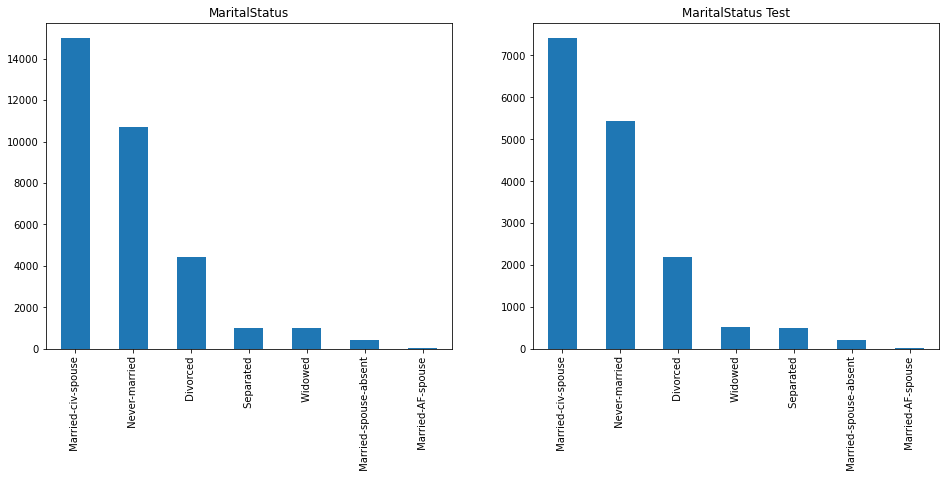

In [199]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6)) #Set the figures
train["MaritalStatus"].value_counts().plot.bar(ax = axes[0]) #Load a bar graph for the train Marital Status
test["MaritalStatus"].value_counts().plot.bar(ax = axes[1]) #Load a bar graph for the test Marital Status
axes[0].set_title("MaritalStatus") #Set the Train title to identify it
axes[1].set_title("MaritalStatus Test") #Set the Test title to identify it
plt.show() #Show the plot

I do not find items like Armed Forces spouse needs to be separate. I will fix this like I fixed Education

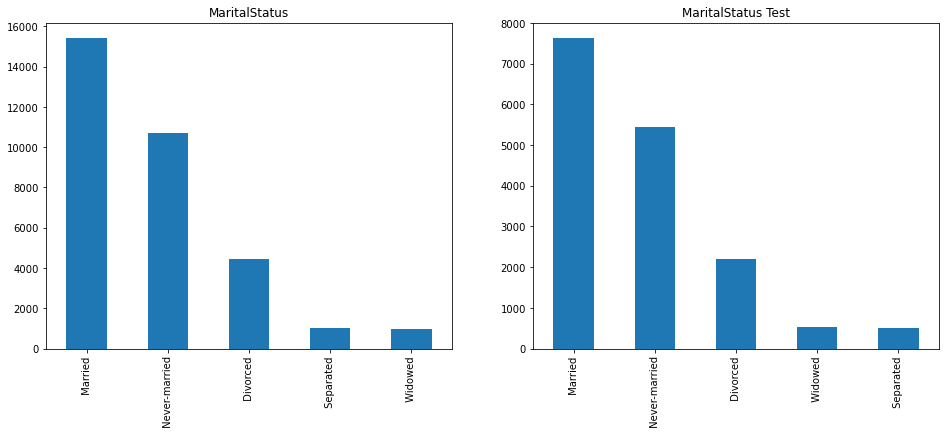

In [200]:
#ConvertMarry: Converts marital status into more congregated groups
#Input: the marital status
#Output: the converted label
def convertMarry(label):
    labelsToChange = [" Married-AF-spouse", " Married-spouse-absent", " Married-civ-spouse"]
    
    #If the person is an AF/absent Spouse
    if label in labelsToChange:
        return " Married" #Return the collective married category
    
    return label #Return the label if there is nothing to change

train["MaritalStatus"] = train["MaritalStatus"].apply(convertMarry) #Convert the train education levels
test["MaritalStatus"] = test["MaritalStatus"].apply(convertMarry) #Convert the test education levels

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6)) #Set the figures
train["MaritalStatus"].value_counts().plot.bar(ax = axes[0]) #Load a bar graph for the train Education
test["MaritalStatus"].value_counts().plot.bar(ax = axes[1]) #Load a bar graph for the test Education
axes[0].set_title("MaritalStatus") #Set the Train title to identify it
axes[1].set_title("MaritalStatus Test") #Set the Test title to identify it
plt.show() #Show the plot

## Occupation

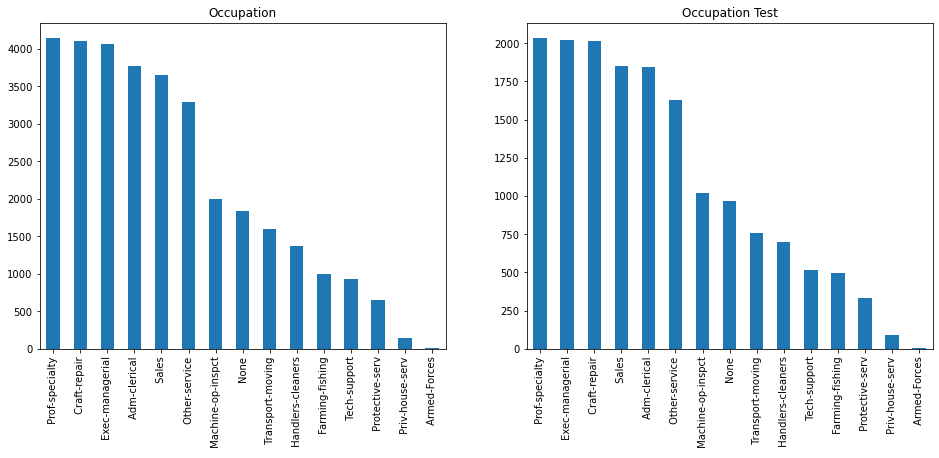

In [201]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6)) #Set the figures
train["Occupation"].value_counts().plot.bar(ax = axes[0]) #Load a bar graph for the train Occupation
test["Occupation"].value_counts().plot.bar(ax = axes[1]) #Load a bar graph for the test Occupation
axes[0].set_title("Occupation") #Set the Train title to identify it
axes[1].set_title("Occupation Test") #Set the Test title to identify it
plt.show() #Show the plot

This honestly looks fine. I do not need to change anything.

## Relationship

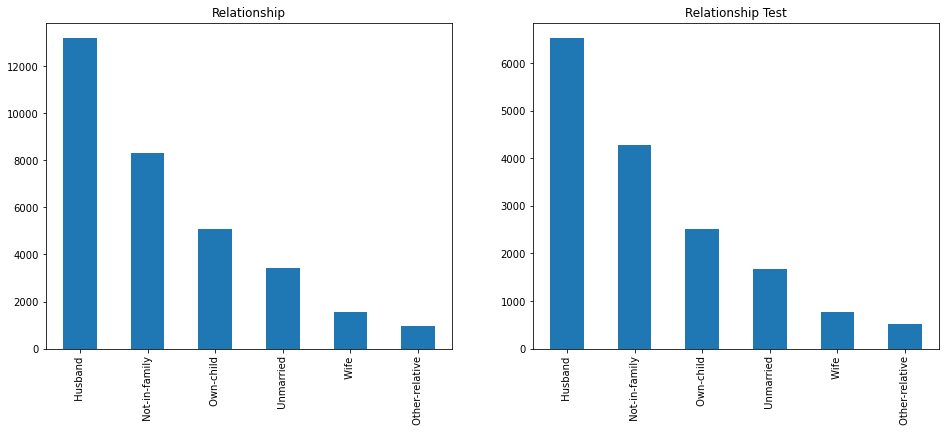

In [202]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6)) #Set the figures
train["Relationship"].value_counts().plot.bar(ax = axes[0]) #Load a bar graph for the train Relationship
test["Relationship"].value_counts().plot.bar(ax = axes[1]) #Load a bar graph for the test Relationship
axes[0].set_title("Relationship") #Set the Train title to identify it
axes[1].set_title("Relationship Test") #Set the Test title to identify it
plt.show() #Show the plot

I did not understand this at first, but it looks to be family members within the household relative to the homeowner. That is why there is much more husband than wife, I assume. I do not see a change that needs to be made.

## Race

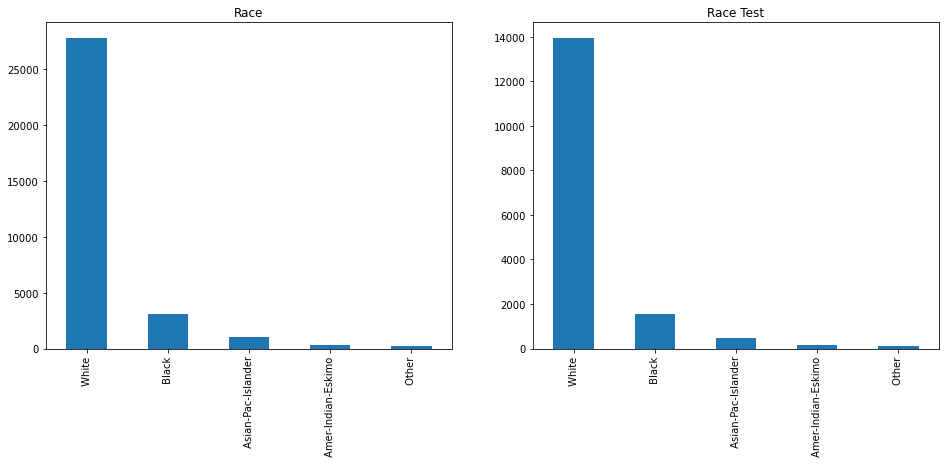

In [203]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6)) #Set the figures
train["Race"].value_counts().plot.bar(ax = axes[0]) #Load a bar graph for the train Race
test["Race"].value_counts().plot.bar(ax = axes[1]) #Load a bar graph for the test Race
axes[0].set_title("Race") #Set the Train title to identify it
axes[1].set_title("Race Test") #Set the Test title to identify it
plt.show() #Show the plot

I am tempted to change this one a bit because of the lower values, but I feel it would take away some of the meaning if I lumped lower values into other. I will let it be.

## Gender

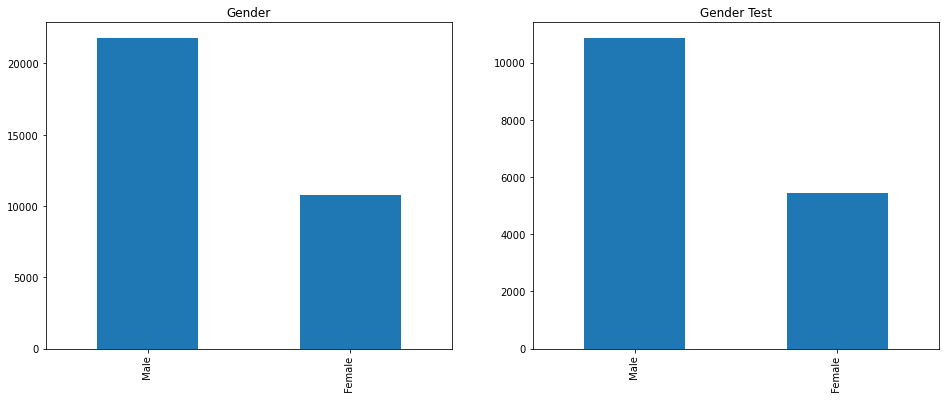

In [204]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6)) #Set the figures
train["Gender"].value_counts().plot.bar(ax = axes[0]) #Load a bar graph for the train Gender
test["Gender"].value_counts().plot.bar(ax = axes[1]) #Load a bar graph for the test Gender
axes[0].set_title("Gender") #Set the Train title to identify it
axes[1].set_title("Gender Test") #Set the Test title to identify it
plt.show() #Show the plot

It is a bit weird that more men are represented here than women, but it is not like there is a third section that could be grouped anywhere else, so this is fine.

## Capital Gain/Loss

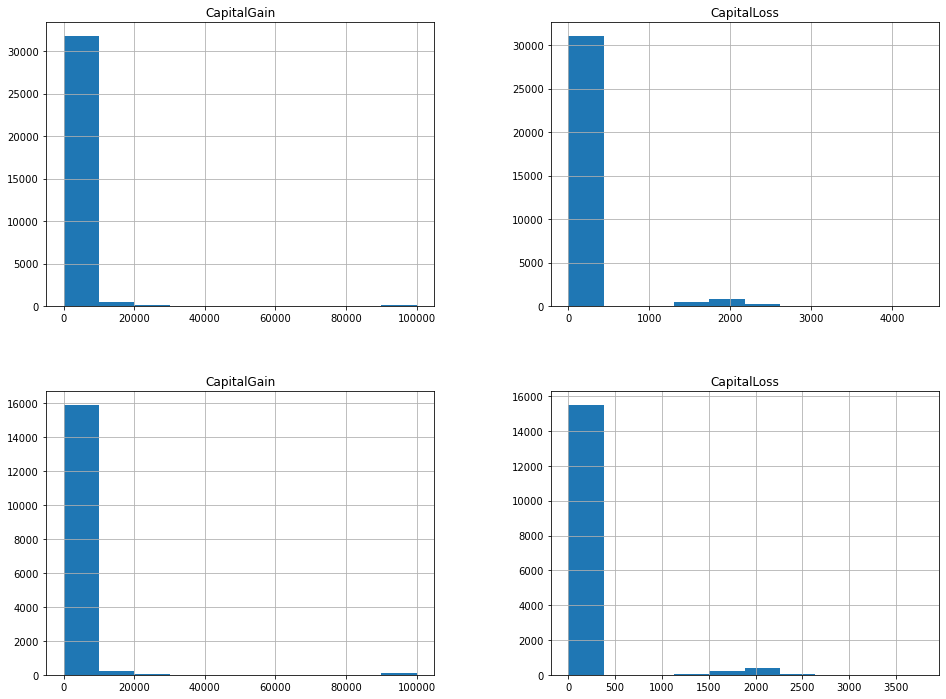

In [205]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,12)) #Set the figures
train.hist(column = ["CapitalGain", "CapitalLoss"], ax = axes[0]) #Load a histogram for the train capital
test.hist(column = ["CapitalGain", "CapitalLoss"], ax = axes[1]) #Load a histogram for the test capital
plt.show() #Show the plot

From looking here and at the dataframes, I can tell a good amount of these values are 0. I think it is best to change this to boolean-esque values for if there was any capital gain/loss or not.

In [206]:
#Change Capital Gain/Loss into 0 and 1 for semi-boolean values
train["CapitalGain"] = train["CapitalGain"].apply(lambda x: 1 if x>0 else 0)
test["CapitalGain"] = test["CapitalGain"].apply(lambda x: 1 if x>0 else 0)
train["CapitalLoss"] = train["CapitalLoss"].apply(lambda x: 1 if x>0 else 0)
test["CapitalLoss"] = test["CapitalLoss"].apply(lambda x: 1 if x>0 else 0)

test.head() #Take a peek at the test dataframe, which has a 1 in the first five

,Age,WorkClass,Education,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursWorked,NativeCountry,IncomeBracket
0,25,Private,Non-Grad,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,HS-grad,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,Associates,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,Some-college,Married,Machine-op-inspct,Husband,Black,Male,1,0,40,United-States,>50K.
4,18,None,Some-college,Never-married,None,Own-child,White,Female,0,0,30,United-States,<=50K.


## Hours Worked

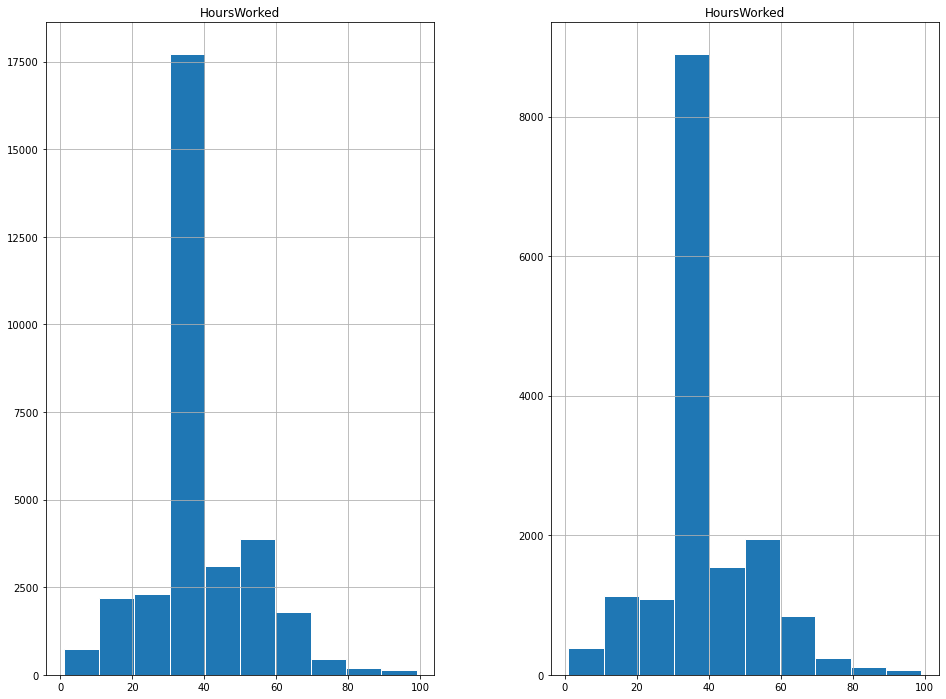

In [207]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,12)) #Set the figures
train.hist(column = "HoursWorked", bins = 10, ax = axes[0], edgecolor = "white") #Load a histogram for the train capital
test.hist(column = "HoursWorked", bins = 10, ax = axes[1], edgecolor = "white") #Load a histogram for the test capital
plt.show() #Show the plot

In [208]:
print(train["HoursWorked"].value_counts())

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: HoursWorked, Length: 94, dtype: int64


There do not seem to be strange hours. Just the majority being 40/hr a week employees. I do feel sad for the overworked people working nearly 95 hours a week, though.

## Native Country

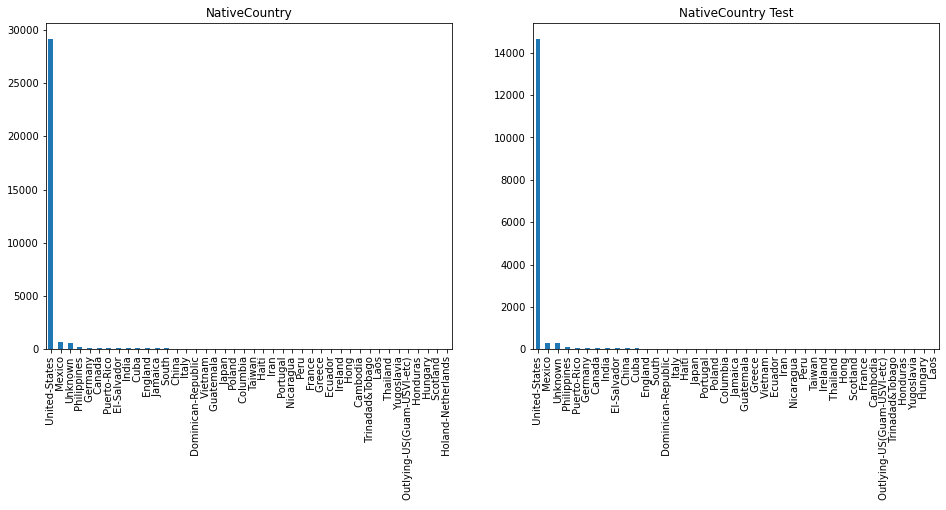

In [209]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6)) #Set the figures
train["NativeCountry"].value_counts().plot.bar(ax = axes[0]) #Load a bar graph for the train NativeCountry
test["NativeCountry"].value_counts().plot.bar(ax = axes[1]) #Load a bar graph for the test NativeCountry
axes[0].set_title("NativeCountry") #Set the Train title to identify it
axes[1].set_title("NativeCountry Test") #Set the Test title to identify it
plt.show() #Show the plot

There are so many countries here. I guess I am going to segment them by major area.

In [210]:
#Country Groupings
Asia = [" Laos", " Thailand", " Taiwan", " Vietnam", " Japan", " Cambodia", " China", " India", " Philippines", " Hong", " Iran"]
Europe = [" Hungary", " Yugoslavia", " France", " Scotland", " Ireland", " Greece", " Poland", " Portugal", " Italy", " England",
         " Germany", " Holand-Netherlands"]
LatinAmerica = [" Honduras", " Trinadad&Tobago",  " Nicaragua", " Peru", " Ecuador", " Guatemala", " Jamaica", " Columbia", " Haiti",
               " Dominican-Republic", " Cuba", " El-Salvador"]
AmericanTerritories = [" Puerto-Rico", " Outlying-US(Guam-USVI-etc)"]

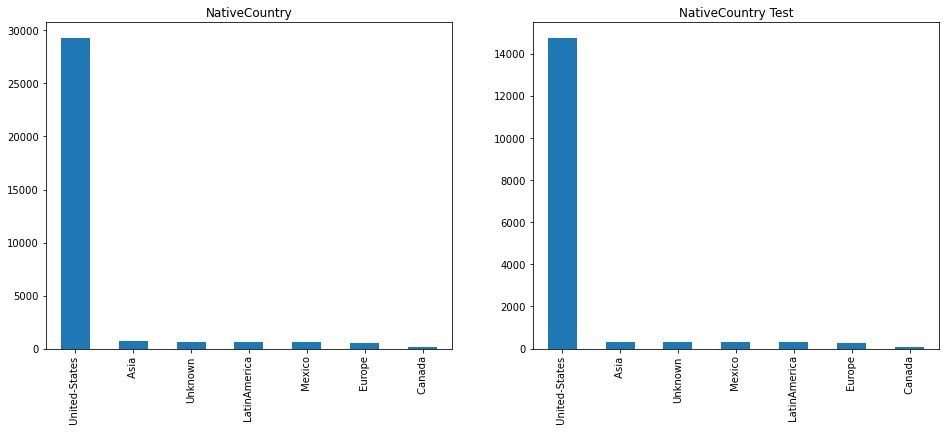

In [211]:
#ConvertCountry: Converts countries into more congregated groups
#Input: the country
#Output: the converted label
def convertCountry(country):
    #If the person is from an Asian country
    if country in Asia:
        return " Asia" #Return the collective Asian category
    
    #If the person is from a European country
    if country in Europe:
        return " Europe" #Return the collective European category
    
    #If the person is from a Latin American country
    if country in LatinAmerica:
        return " LatinAmerica" #Return the collective Latin America category
    
    #If the person is from a US Territory
    if country in AmericanTerritories:
        return " United-States" #Return United-States, as it is part of the US
    
    #If the country is just listed as south
    if country == " South":
        return "Unknown" #Return unknown because what do you mean "south"?
    
    return country #Return the country if there is nothing to change

train["NativeCountry"] = train["NativeCountry"].apply(convertCountry) #Convert the train countries
test["NativeCountry"] = test["NativeCountry"].apply(convertCountry) #Convert the test countries

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6)) #Set the figures
train["NativeCountry"].value_counts().plot.bar(ax = axes[0]) #Load a bar graph for the train NativeCountry
test["NativeCountry"].value_counts().plot.bar(ax = axes[1]) #Load a bar graph for the test NativeCountry
axes[0].set_title("NativeCountry") #Set the Train title to identify it
axes[1].set_title("NativeCountry Test") #Set the Test title to identify it
plt.show() #Show the plot

This looks fine. The vast majority is US Citizens, but in a US Census, that is to be expected.

## Income Bracket

This is what we are testing, so I am just going to put 0 for less than 50k and 1 for more than 50k, just to make things easier later.

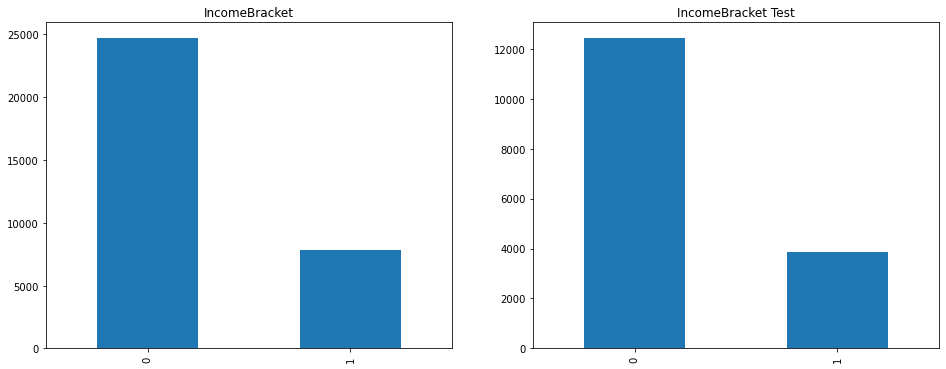

In [212]:
#Changes <=50K into 0 and >50K into 1, indicating less than or more than 50K per year respectively
#Also, it checks if x is already 0, because if so, it will turn it into a 1 and everything will be 1 (happy day for everyone under 50K)
train["IncomeBracket"] = train["IncomeBracket"].apply(lambda x: 0 if x == " <=50K" or x == 0 else 1)
test["IncomeBracket"] = test["IncomeBracket"].apply(lambda x: 0 if x == " <=50K." or x == 0 else 1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6)) #Set the figures
train["IncomeBracket"].value_counts().plot.bar(ax = axes[0]) #Load a bar graph for the train IncomeBracket
test["IncomeBracket"].value_counts().plot.bar(ax = axes[1]) #Load a bar graph for the test IncomeBracket
axes[0].set_title("IncomeBracket") #Set the Train title to identify it
axes[1].set_title("IncomeBracket Test") #Set the Test title to identify it
plt.show() #Show the plot

The data is now clean. Proceed

---

# Model Building

In [213]:
#These are the y (value being tracked) for our train test split
incomeTrain = train["IncomeBracket"].copy()
incomeTest = test["IncomeBracket"].copy()


#These are the x (values being tested against) for our train test split
characterTrain = train.drop("IncomeBracket", axis = 1)
characterTest = test.drop("IncomeBracket", axis = 1)

#Encode our variables so they can be read by the regression
characterTrain = pd.get_dummies(characterTrain)
characterTest = pd.get_dummies(characterTest)

characterTest.head() #Print one of the characteristics segments to make sure structure is right.

,Age,CapitalGain,CapitalLoss,HoursWorked,WorkClass_ Federal-gov,WorkClass_ Local-gov,WorkClass_ Private,WorkClass_ Self-emp-inc,WorkClass_ Self-emp-not-inc,WorkClass_ State-gov,...,Race_ White,Gender_ Female,Gender_ Male,NativeCountry_ Asia,NativeCountry_ Canada,NativeCountry_ Europe,NativeCountry_ LatinAmerica,NativeCountry_ Mexico,NativeCountry_ United-States,NativeCountry_Unknown
0,25,0,0,40,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,38,0,0,50,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2,28,0,0,40,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3,44,1,0,40,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,18,0,0,30,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [214]:
stdScale = StandardScaler() #Bring in the standard scaler to scale the data
stdScale.fit(characterTrain) #Fit the scaler to our train set
characterTrain = stdScale.transform(characterTrain) #Scale the train set
characterTest = stdScale.transform(characterTest) #Scale the test set

I have just learned that Logistic regression is technically classification algorithm, so I will take the time and compare it against other classification algorithms in Scikit-Learn to see if I can boost the accuracy, playing with hyperparameters.

In [215]:
regression = LogisticRegression(C = 0.9, class_weight = "Balanced") #Initialize the logistic regression
regression.fit(characterTrain, incomeTrain) #Fit the logistic regression

clf = ExtraTreesClassifier(n_estimators = 100, max_depth = 5, min_samples_split = 2, random_state = 0) #Initialize the extra trees classifier
clf.fit(characterTrain, incomeTrain) #Fit the lots of trees model

clf2 = DecisionTreeClassifier(max_depth = None, random_state = 0) #Classifies with just a tree
clf2.fit(characterTrain, incomeTrain) #Fit the single tree

clf3 = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.5, max_depth = 1, random_state = 0) #Initialize the gradient boosting classifier
clf3.fit(characterTrain, incomeTrain) #Fit the gradient boost

ereg = VotingClassifier(estimators = [('lr', regression), ('et', clf), ('dt', clf2), ('gb', clf3)]) #Initialize the voting classifier
ereg = ereg.fit(characterTrain, incomeTrain) #Fit the voting

---

# Predict and Graph

In [216]:
#Print the scores for all the different classifiers
print("Logistic Regression Score: ", regression.score(characterTest, incomeTest))
print("Extreme Random Forest Score: ", clf.score(characterTest, incomeTest))
print("Decision Tree Score: ", clf2.score(characterTest, incomeTest))
print("Gradient Boosting Score: ", clf3.score(characterTest, incomeTest))
print("Voting Classification Score: ", ereg.score(characterTest, incomeTest))

Logistic Regression Score:  0.8453411952582766
Extreme Random Forest Score:  0.8197285179043057
Decision Tree Score:  0.7973711688471224
Gradient Boosting Score:  0.8518518518518519
Voting Classification Score:  0.8387076960874639


Of the models, it appears that only the Gradient Boost actually beat the Logistic Regression like I hoped, but it did not beat it by much. These were the best I could get with hyperparameter tuning, so the Logistic Regression I started with was still one of the strongest players here.